# Intro

## Features

### Popularity indicators
- stargazers_count -> number of stars
- forks_count
- subscribers_count
- downloads count for 2015 and 2016

### Features of projects
- size
- dependencies_count
- mainteiners_count
- contributors_count
- has_tests
- has_readme
- open_issues_count

In [43]:
# Following code just fetches features from database and creates numpy arrays from it.
import sys
import os
import numpy as np
import psycopg2

wk_dir = os.path.dirname(os.path.realpath('__file__'))
sys.path.append(
        os.path.abspath(os.path.join(wk_dir, '..')))

from source.helpers.db import execute, fetch

result = fetch('''
SELECT stargazers_count, forks_count,
        open_issues_count, size, subscribers_count,
        dependencies_count, mainteiners_count,
        contributors_count, has_tests, has_readme, t.downloads
        FROM (
                SELECT repo_id, SUM(count) AS downloads
                FROM downloads
                GROUP BY repo_id
        ) t LEFT JOIN repos r on r.id = t.repo_id
        WHERE has_readme is not Null
        ORDER BY RANDOM();
''')


X_tmp = []
Y_tmp = []
for r in result:
    y = [r[0], r[1], r[4], r[10]] # contains stargazers_count, forks_count, subscribers_count
    x = [r[2], r[3], r[5], r[6], r[7], int(r[8]), int(r[9])] 
    # contains open_issues_count, size, dependencies_count, mainteiners_count, 
    # contributors_count, has_tests, has_readme 
    X_tmp.append(x)
    Y_tmp.append(y)

X_labels = ["open_issues_count", "size", "dependencies_count", 
            "mainteiners_count", "contributors_count", "has_tests", "has_readme"]
Y_labels = ["stars", "forks", "subscribers", "downloads"]
X = np.array(X_tmp, dtype=np.float64)
Y = np.array(Y_tmp, dtype=np.float64)

In [24]:
# here we take a look at how many packages have tests and how many of them have readme file

column_sum = np.sum(X, axis=0)
has_tests_total = column_sum[5]
has_readme_total = column_sum[6]
total = X.shape[0]
print("Packages that have tests: {} / {}".format(has_tests_total, total))
print("Packages that have readme file: {} / {}".format(has_readme_total, total))


Packages that have tests: 106854.0 / 139822
Packages that have readme file: 126454.0 / 139822


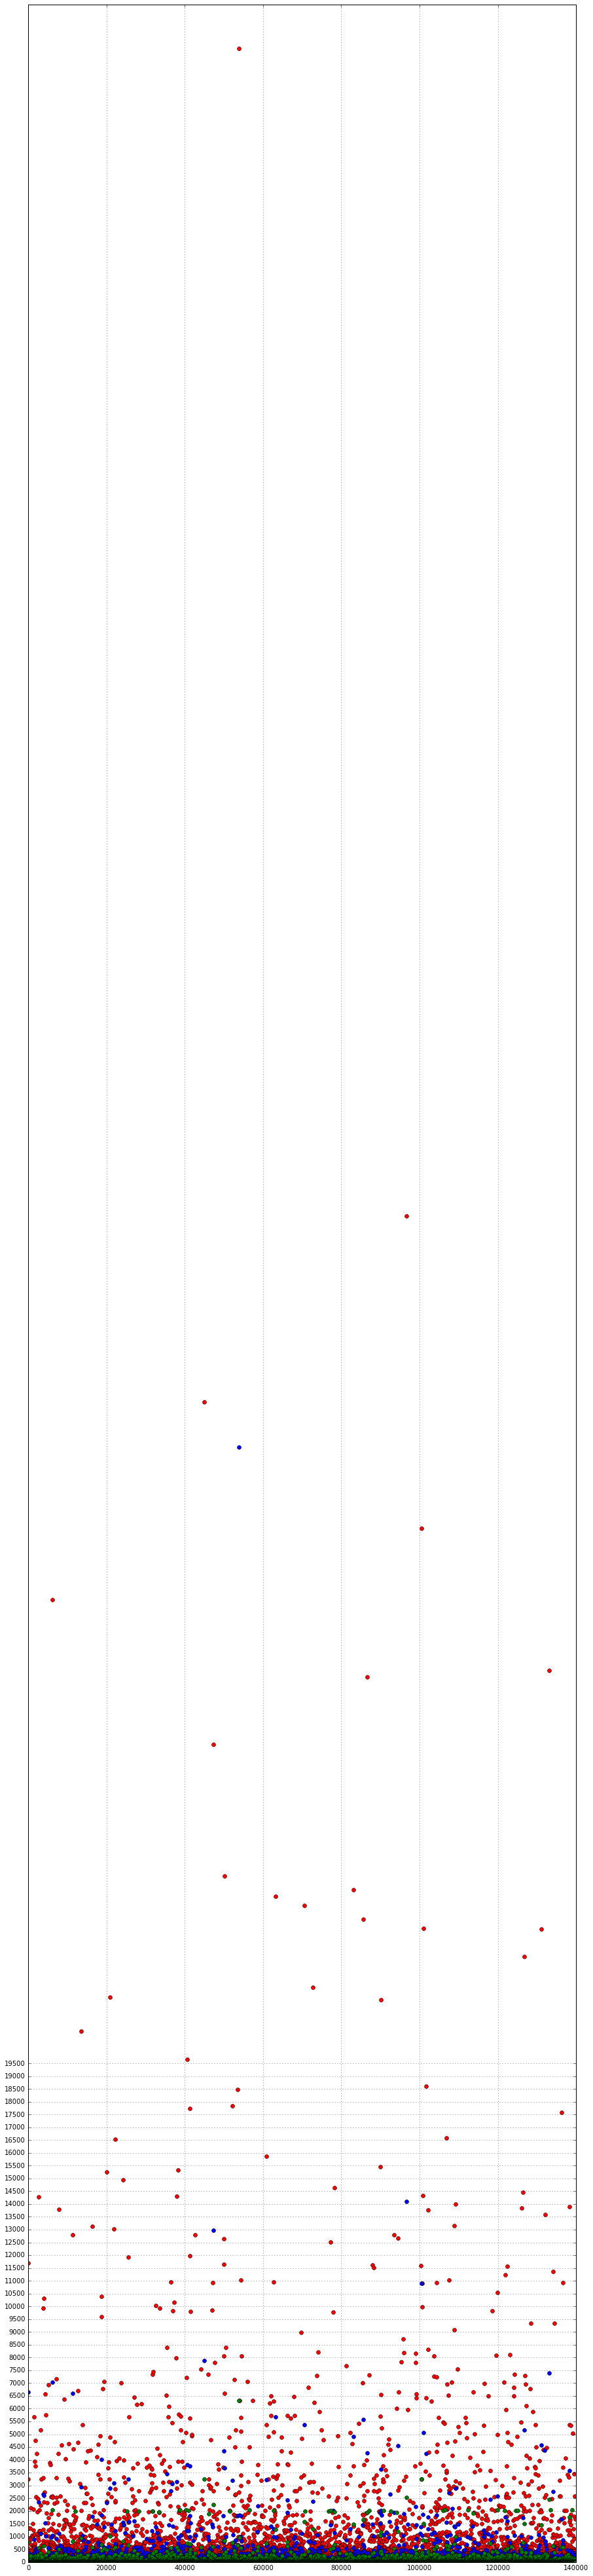

In [25]:
# the following plot helps to see distribution of value
# we made the graph very high so the distribution can be viewed better

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 70), dpi=80)
plt.plot(Y[:, 0], 'ro')
plt.plot(Y[:, 1], 'bo')
plt.plot(Y[:, 2], 'go')
plt.yticks( np.arange(0, 20000, 500.0))
plt.grid()
plt.show()

In the graph above we can see that red dots (number of stars) stand out and differentiate the repos the most. Even though most of the repos have very low stars count.

In [26]:
# predefine helper functions to calculate mea, media, mode, quartiles, variance 
# and wrapper function that prints all of them
from scipy import stats

def print_mean(X):
    print("Mean: ", np.mean(X))

        
def print_median(X):
    print("Median: ", np.median(X))
    
def print_mode(X):
    print("Mode: ", stats.mode(X))

def print_quartiles(X):
    print("Q1: ", np.percentile(X, 25))
    print("Q2: ", np.percentile(X, 50))
    print("Q3: ", np.percentile(X, 75))
    
def print_variance(X):
    print("Variance: ", np.var(X))

def print_analysis(X):
    print_mean(X)
    print_median(X)
    print_mode(X)
    print_quartiles(X)
    print_variance(X)

In [27]:
# analyzing popularity features

print("Stars")
print_analysis(Y[:, 0])
print("===========================")

print("Forks")
print_analysis(Y[:, 1])
print("===========================")

print("Subribers")
print_analysis(Y[:, 2])
print("===========================")

print("Downloads")
print_analysis(Y[:, 3])





Stars
Mean:  43.8910400366
Median:  1.0
Mode:  ModeResult(mode=array([ 0.]), count=array([59220]))
Q1:  0.0
Q2:  1.0
Q3:  5.0
Variance:  355277.03262
Forks
Mean:  7.52488163522
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([87228]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  25251.0039975
Subribers
Mean:  5.41156613408
Median:  1.0
Mode:  ModeResult(mode=array([ 1.]), count=array([80062]))
Q1:  1.0
Q2:  1.0
Q3:  2.0
Variance:  2148.82254592
Downloads
Mean:  396484.908033
Median:  909.0
Mode:  ModeResult(mode=array([ 266.]), count=array([200]))
Q1:  353.0
Q2:  909.0
Q3:  2801.0
Variance:  4.11504832811e+13


In [28]:
# analyzing project features

print("Open issues count")
print_analysis(X[:, 0])
print("===========================")

print("Size")
print_analysis(X[:, 1])
print("===========================")

print("Dependencies")
print_analysis(X[:, 2])
print("===========================")

print("Mainteiners")
print_analysis(X[:, 3])
print("===========================")

print("Contributors")
print_analysis(X[:, 4])
print("===========================")

Open issues count
Mean:  2.06561914434
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([100573]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  355.852662273
Size
Mean:  975.123192345
Median:  128.0
Mode:  ModeResult(mode=array([ 3.]), count=array([2733]))
Q1:  20.0
Q2:  128.0
Q3:  220.0
Variance:  107279646.112
Dependencies
Mean:  2.67713235399
Median:  1.0
Mode:  ModeResult(mode=array([ 0.]), count=array([43796]))
Q1:  0.0
Q2:  1.0
Q3:  3.0
Variance:  19.8549474545
Mainteiners
Mean:  1.17560898857
Median:  1.0
Mode:  ModeResult(mode=array([ 1.]), count=array([128074]))
Q1:  1.0
Q2:  1.0
Q3:  1.0
Variance:  1.3951888608
Contributors
Mean:  0.251791563559
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([129876]))
Q1:  0.0
Q2:  0.0
Q3:  0.0
Variance:  28.500332038


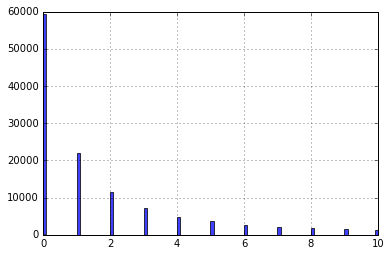

In [29]:

import matplotlib.mlab as mlab

mu, sigma = 100, 15
# the histogram of the data
n, bins, patches = plt.hist(Y[:, 0], 100, range=(0, 10), normed=False, alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.grid(True)

plt.show()

This plot shows histogram for repositories with 10 and less stars, most of the repositories are in this range and overwhelming majory has 0 stars.

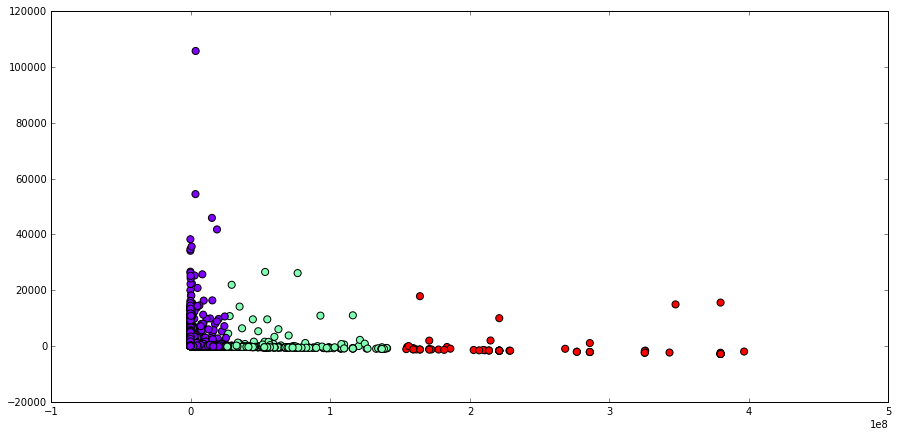

In [30]:
# We cluster popularity features into 3 groups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Y)
transformed = pca.transform(Y)

est = KMeans(3)
est.fit(transformed)

y_kmeans = est.predict(transformed)
plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y_kmeans, s=50, cmap='rainbow');

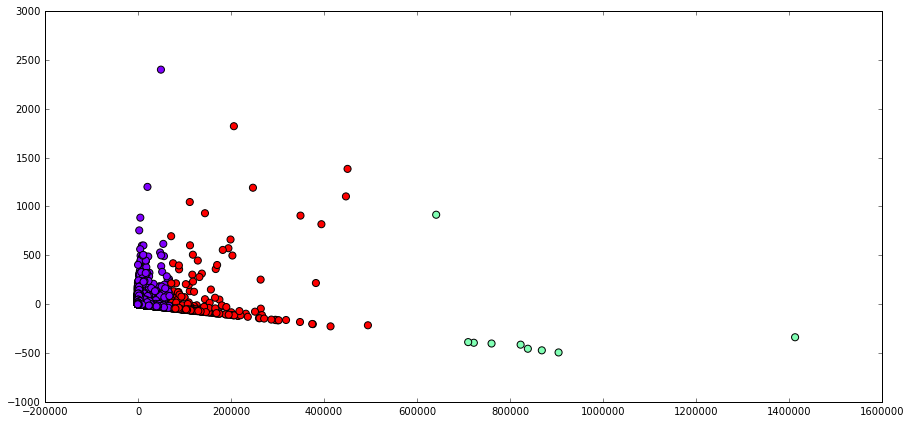

In [31]:
# We cluster project features into 3 groups
est = KMeans(3)  # 4 clusters
est.fit(X)

x_kmeans = est.predict(X)


pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

plt.figure(figsize=(15, 7), dpi=80)
plt.scatter(transformed[:, 0], transformed[:, 1], c=x_kmeans, s=50, cmap='rainbow');

# Correlations

In [52]:
# We look for correlations between project features.
from sklearn import preprocessing
from scipy.stats.stats import pearsonr   

for i in range(0, Y.shape[1]):
    for j in range(i + 1, Y.shape[1]):
        a = preprocessing.scale(Y[:, i])
        b = preprocessing.scale(Y[:, j])
        print("{} <--> {}".format(Y_labels[i], Y_labels[j]))
        print(pearsonr(a,b))

stars <--> forks
(0.85856444559085521, 0.0)
stars <--> subscribers
(0.70163746735377075, 0.0)
stars <--> downloads
(0.079051408828225964, 1.2660544931519823e-192)
forks <--> subscribers
(0.666509905577788, 0.0)
forks <--> downloads
(0.038680363793089756, 1.9036022189477512e-47)
subscribers <--> downloads
(0.039945547369452286, 1.7410006731457714e-50)


Stars, forks and stars, subscribers correlate quite well. However to my suprise stars and number of downloads does not correlate at all.

In [53]:

for i in range(0, X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(X[:, j])
        print("{} <--> {}".format(X_labels[i], X_labels[j]))
        print(pearsonr(a,b))
        print("\n")


open_issues_count <--> size
(0.29885235107922903, 0.0)


open_issues_count <--> dependencies_count
(0.098931450570880555, 5.1090921817667522e-301)


open_issues_count <--> mainteiners_count
(0.067227441568206897, 9.3347980915588168e-140)


open_issues_count <--> contributors_count
(0.099062362660545369, 8.1849711767411415e-302)


open_issues_count <--> has_tests
(-0.00062133419416328362, 0.81628010244243643)


open_issues_count <--> has_readme
(0.0073198019301363559, 0.0061985402088523527)


size <--> dependencies_count
(0.050697139198743212, 3.071311866107335e-80)


size <--> mainteiners_count
(0.030514827952889234, 3.6051436110282239e-30)


size <--> contributors_count
(0.014502041874325857, 5.8622317293516655e-08)


size <--> has_tests
(-0.025889258786497761, 3.5873351286488257e-22)


size <--> has_readme
(-0.00029358630392791959, 0.91258456515143227)


dependencies_count <--> mainteiners_count
(0.10266391339385104, 4.9406564584124654e-324)


dependencies_count <--> contributors_cou

In [54]:
# We look for correlations between project features and popularity indicators. 
for i in range(0, X.shape[1]):
    for j in range(0, Y.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(Y[:, j])
        print("{} <--> {}".format(X_labels[i], Y_labels[j]))
        print(pearsonr(a,b))


open_issues_count <--> stars
(0.50187757752672357, 0.0)
open_issues_count <--> forks
(0.41761382282643078, 0.0)
open_issues_count <--> subscribers
(0.39499120435380985, 0.0)
open_issues_count <--> downloads
(0.035874738397220843, 4.6949575600815163e-41)
size <--> stars
(0.17932941438271943, 0.0)
size <--> forks
(0.17897159475367169, 0.0)
size <--> subscribers
(0.16957727526297064, 0.0)
size <--> downloads
(0.0089096417819074548, 0.00086348553141083449)
dependencies_count <--> stars
(0.059304400280901975, 3.8469963825195172e-109)
dependencies_count <--> forks
(0.02846834672493755, 1.7974876758940701e-26)
dependencies_count <--> subscribers
(0.060121810735806649, 4.0243368241225567e-112)
dependencies_count <--> downloads
(0.015388468342944732, 8.6916417506262255e-09)
mainteiners_count <--> stars
(0.052303680613602889, 2.7315364245723519e-85)
mainteiners_count <--> forks
(0.032824587153168612, 1.2004702182104058e-34)
mainteiners_count <--> subscribers
(0.10381975518006002, 0.0)
mainteiner